In [1]:
import os
import pandas as pd

from C_oblique_decision_trees.evaluation.benchmark_runner import DepthSweepRunner
from C_oblique_decision_trees.visualization import (
    plot_metric_vs_depth_per_dataset_and_algorithm,
    plot_metric_vs_depth_per_algorithm,
    plot_metric_vs_depth_per_shape,
    plot_seed_std_vs_depth_per_algorithm
)
from C_oblique_decision_trees.visualization.batch_results_plots import plot_coverage_density_all_shapes_for_algorithm
from src.load_shapes import load_shape_dataset
from src.config.paths import DEPTH_SWEEP_BATCH_RESULTS_OUTPUTS_DIR

In [4]:
datasets = load_shape_dataset(folder_name="")


Paired Datasets available are: ['barbell_2d_fuzz_000', 'barbell_3d_fuzz_000', 'radial_segment_2d_fuzz_000', 'radial_segment_3d_fuzz_000', 'rectangle_2d_fuzz_000', 'saddle_3d_fuzz_000', 'sine_wave_2d_fuzz_000', 'star_2d_fuzz_000', 'barbell_2d_fuzz_003', 'barbell_3d_fuzz_003', 'radial_segment_2d_fuzz_003', 'radial_segment_3d_fuzz_003', 'rectangle_2d_fuzz_003', 'saddle_3d_fuzz_003', 'sine_wave_2d_fuzz_003', 'star_2d_fuzz_003', 'barbell_2d_fuzz_005', 'barbell_3d_fuzz_005', 'radial_segment_2d_fuzz_005', 'radial_segment_3d_fuzz_005', 'rectangle_2d_fuzz_005', 'saddle_3d_fuzz_005', 'sine_wave_2d_fuzz_005', 'star_2d_fuzz_005', 'barbell_2d_fuzz_007', 'barbell_3d_fuzz_007', 'radial_segment_2d_fuzz_007', 'radial_segment_3d_fuzz_007', 'rectangle_2d_fuzz_007', 'saddle_3d_fuzz_007', 'sine_wave_2d_fuzz_007', 'star_2d_fuzz_007']


In [3]:
# datasets_dict = {
#     "barbell_2d_no_noise": datasets["barbell_2d_no_noise"],
#     "barbell_3d_no_noise": datasets["barbell_3d_no_noise"],
#     "radial_segment_2d_no_noise": datasets["radial_segment_2d_no_noise"],
#     "radial_segment_3d_no_noise": datasets["radial_segment_3d_no_noise"],
#     "rectangle_2d_no_noise": datasets["rectangle_2d_no_noise"],
#     "sine_wave_2d_no_noise": datasets["sine_wave_2d_no_noise"],
#     "saddle_3d_no_noise": datasets["saddle_3d_no_noise"],
#     "star_2d_no_noise": datasets["star_2d_no_noise"]
# }

In [ ]:
runner = DepthSweepRunner(datasets, max_depth=20)
depth_sweep_df = runner.run(filename="depth_sweep_local.csv", n_seeds=5, fixed_seed=None)

Depth Sweeping:   2%|▏         | 59/3360 [00:35<49:55,  1.10it/s]

In [ ]:
# df = runner.run(filename="depth_sweep_local.csv", n_seeds=1, fixed_seed=5)

In [ ]:
# depth_sweep_df = runner.run(filename="depth_sweep_local.csv", n_seeds=2)

In [4]:
# Load CSV
results_file = os.path.join(DEPTH_SWEEP_BATCH_RESULTS_OUTPUTS_DIR, "depth_sweep_multiple_seeds.csv")
df = pd.read_csv(results_file)

In [5]:
# Prepare folders for different plot types
plot_root_dir = os.path.join(DEPTH_SWEEP_BATCH_RESULTS_OUTPUTS_DIR, "plots")
per_algorithm_dataset_dir = os.path.join(plot_root_dir, "grouped_by_algorithm_and_dataset")
per_algorithm_dir = os.path.join(plot_root_dir, "grouped_by_algorithm")
per_shape_dir = os.path.join(plot_root_dir, "grouped_by_shape")

for path in [per_algorithm_dataset_dir, per_algorithm_dir, per_shape_dir]:
    os.makedirs(path, exist_ok=True)

In [6]:
# Plot settings
metrics = ["accuracy", "coverage", "density"]
x_lim = (0, df["depth"].max())
y_lim = (0.0, 1.0)

Figure saved: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_batch_results\plots\grouped_by_algorithm_and_dataset\accuracy_vs_depth__grouped_by_algorithm_and_dataset.pdf


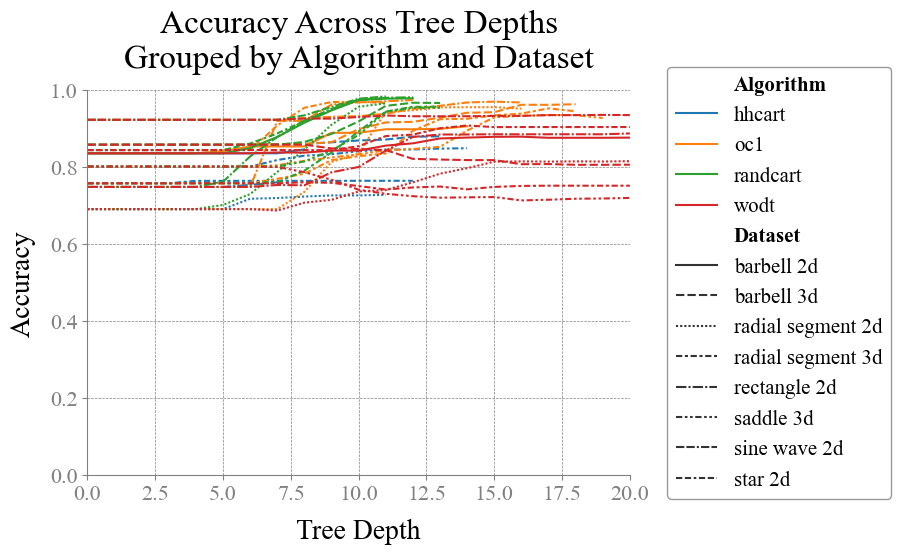

Figure saved: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_batch_results\plots\grouped_by_algorithm_and_dataset\coverage_vs_depth__grouped_by_algorithm_and_dataset.pdf


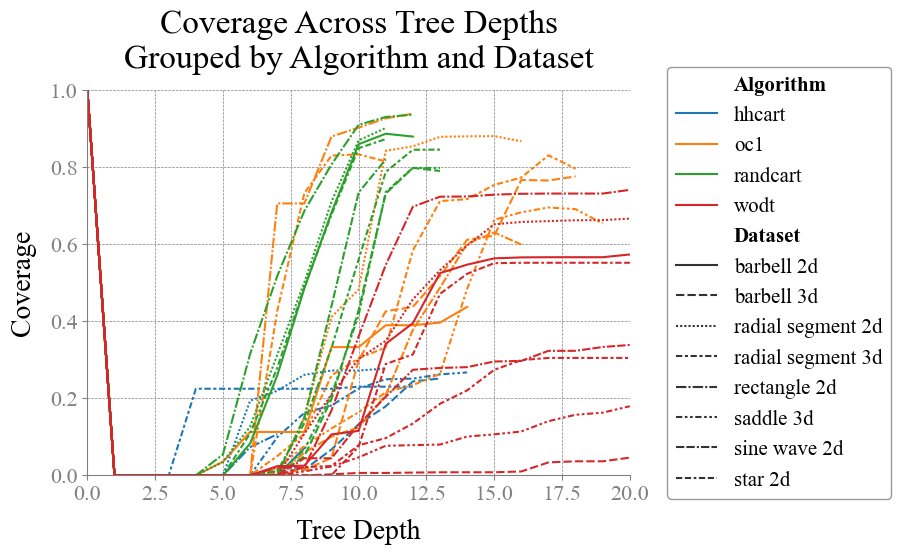

Figure saved: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_batch_results\plots\grouped_by_algorithm_and_dataset\density_vs_depth__grouped_by_algorithm_and_dataset.pdf


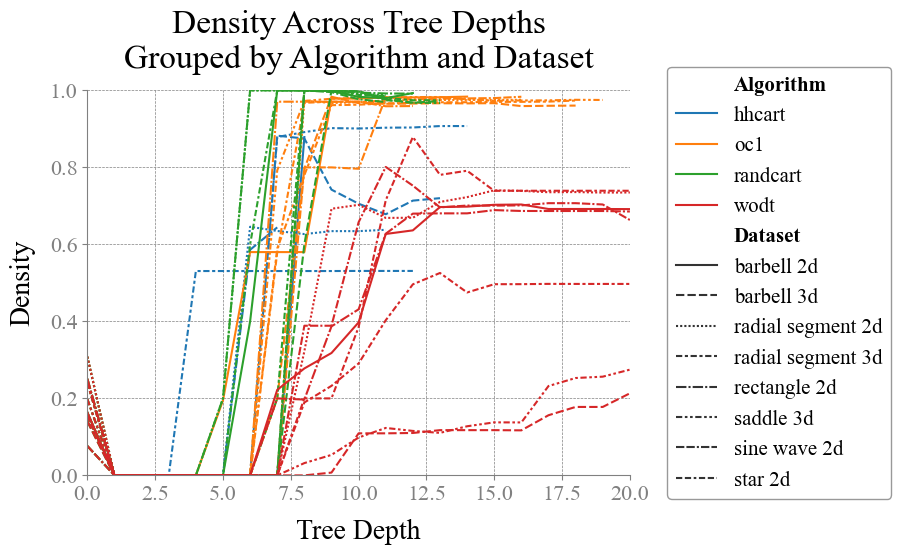

In [7]:
# === 1. One line per algorithm-dataset combo === #
for metric in metrics:
    save_path = os.path.join(per_algorithm_dataset_dir, f"{metric}_vs_depth__grouped_by_algorithm_and_dataset.pdf")
    title = f"{metric.capitalize()} Across Tree Depths\nGrouped by Algorithm and Dataset"
    
    plot_metric_vs_depth_per_dataset_and_algorithm(
        df=df,
        metric=metric,
        title=title,
        x_lim=x_lim,
        y_lim=y_lim,
        xlabel="Tree Depth",
        ylabel=metric.capitalize(),
        save_name=save_path
    )

Figure saved: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_batch_results\plots\grouped_by_algorithm\accuracy_vs_depth__grouped_by_algorithm.pdf


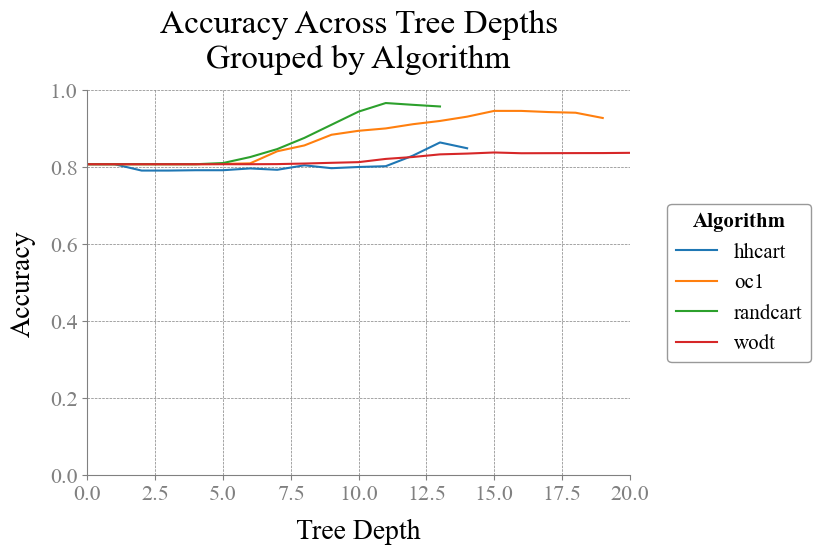

Figure saved: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_batch_results\plots\grouped_by_algorithm\coverage_vs_depth__grouped_by_algorithm.pdf


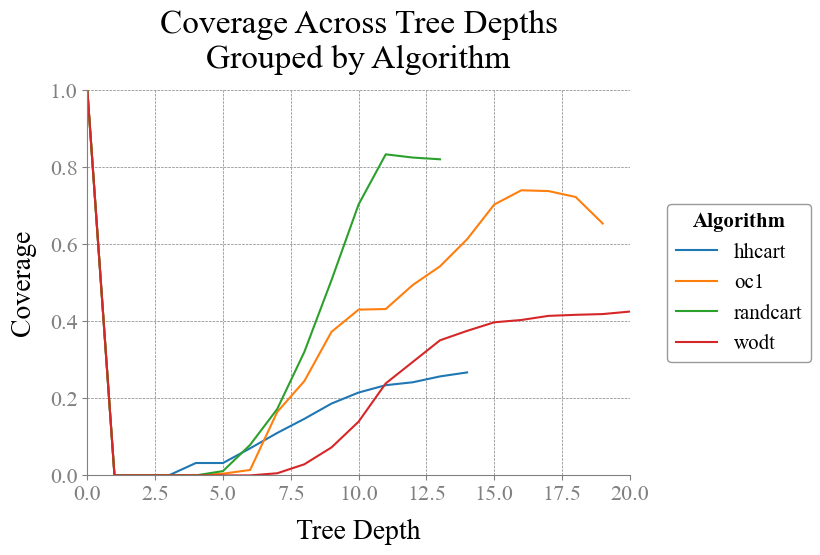

Figure saved: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_batch_results\plots\grouped_by_algorithm\density_vs_depth__grouped_by_algorithm.pdf


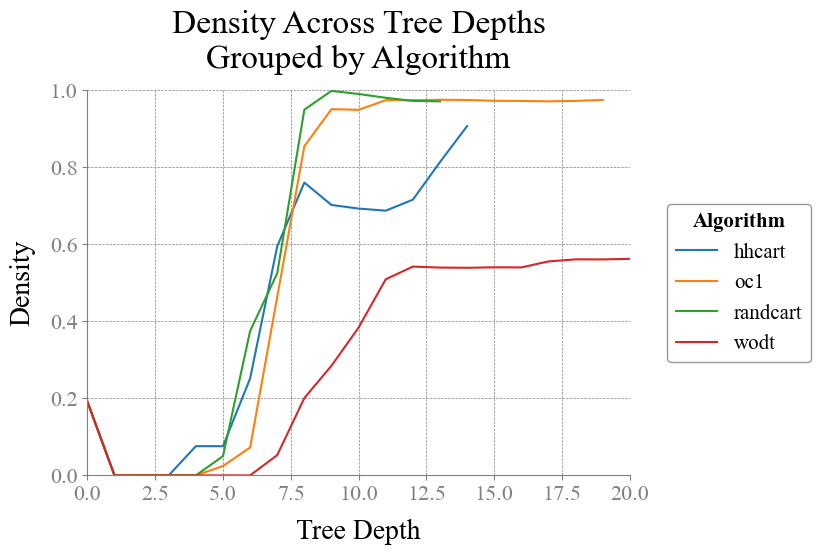

In [8]:
# === 2. Aggregated by algorithm (mean over datasets) === #
for metric in metrics:
    save_path = os.path.join(per_algorithm_dir, f"{metric}_vs_depth__grouped_by_algorithm.pdf")
    title = f"{metric.capitalize()} Across Tree Depths\nGrouped by Algorithm"

    plot_metric_vs_depth_per_algorithm(
        df=df,
        metric=metric,
        title=title,
        x_lim=x_lim,
        y_lim=y_lim,
        xlabel="Tree Depth",
        ylabel=metric.capitalize(),
        save_name=save_path,
        show_bands=False
    )

Figure saved: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_batch_results\plots\grouped_by_shape\accuracy_vs_depth__grouped_by_shape.pdf


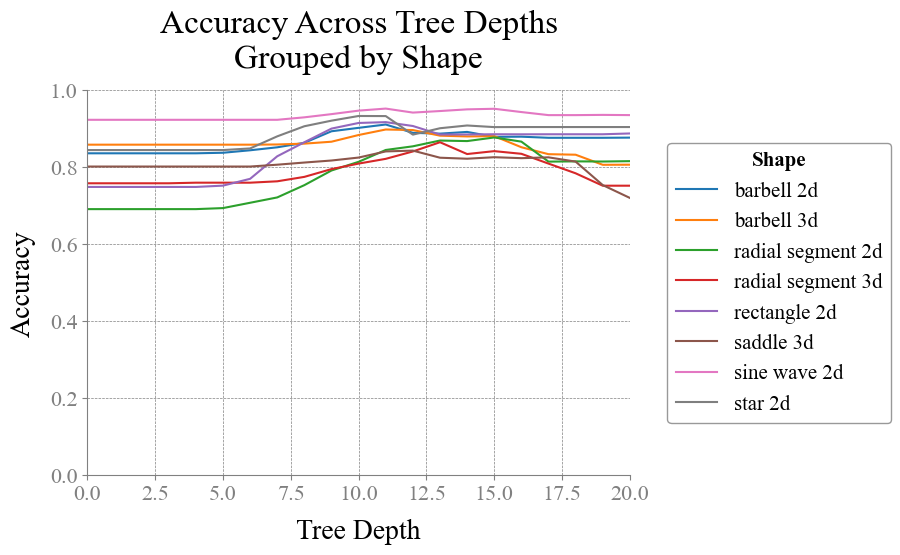

Figure saved: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_batch_results\plots\grouped_by_shape\coverage_vs_depth__grouped_by_shape.pdf


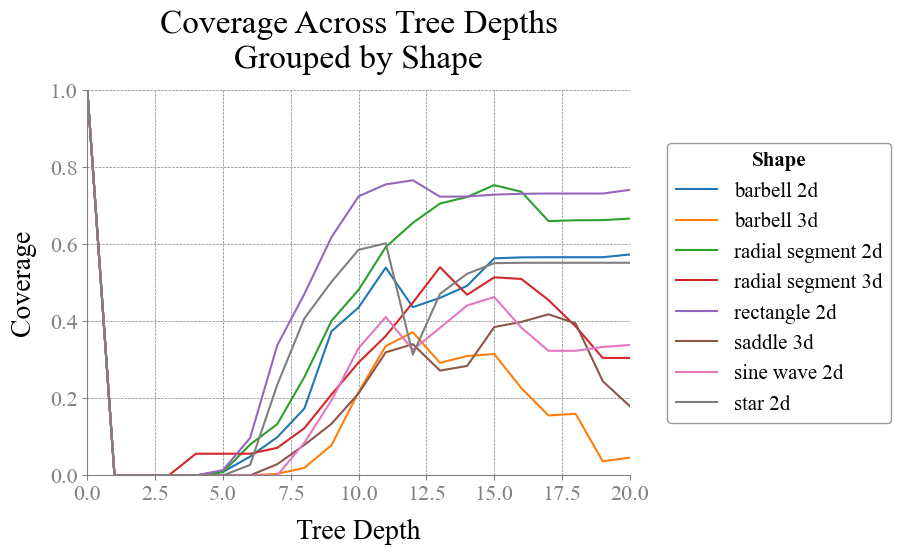

Figure saved: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_batch_results\plots\grouped_by_shape\density_vs_depth__grouped_by_shape.pdf


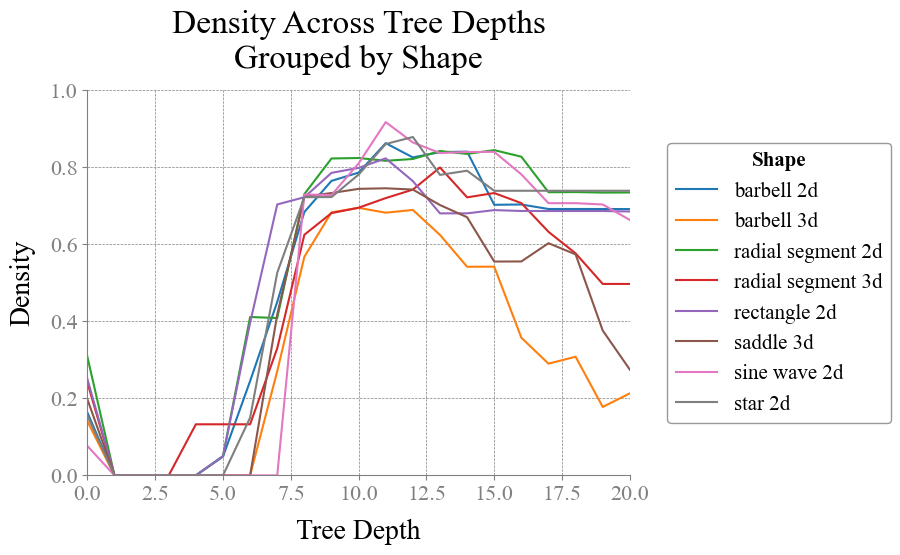

In [9]:
# === 3. Aggregated by shape (mean over algorithms) === #
for metric in metrics:
    save_path = os.path.join(per_shape_dir, f"{metric}_vs_depth__grouped_by_shape.pdf")
    title = f"{metric.capitalize()} Across Tree Depths\nGrouped by Shape"

    plot_metric_vs_depth_per_shape(
        df=df,
        metric=metric,
        title=title,
        x_lim=x_lim,
        y_lim=y_lim,
        xlabel="Tree Depth",
        ylabel=metric.capitalize(),
        save_name=save_path,
        show_bands=False
    )

Figure saved: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_batch_results\plots\grouped_by_algorithm\accuracy_seed_std_vs_depth__grouped_by_algorithm.pdf


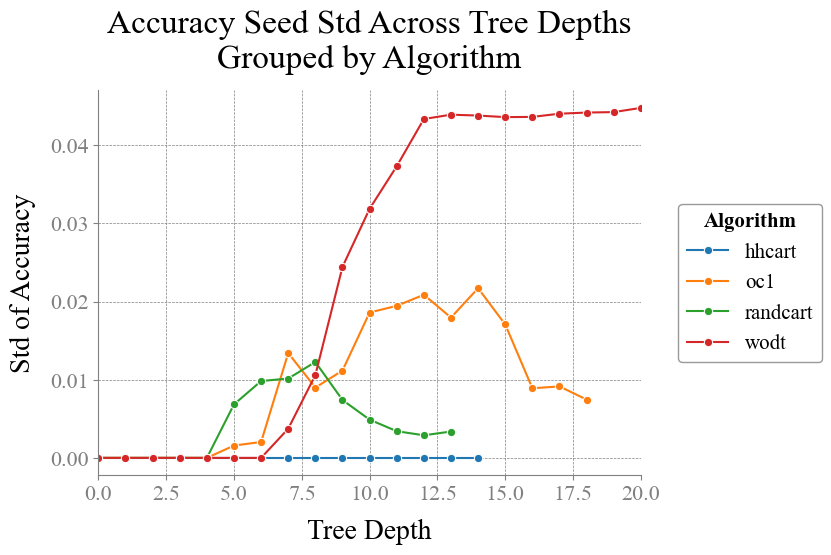

Figure saved: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_batch_results\plots\grouped_by_algorithm\coverage_seed_std_vs_depth__grouped_by_algorithm.pdf


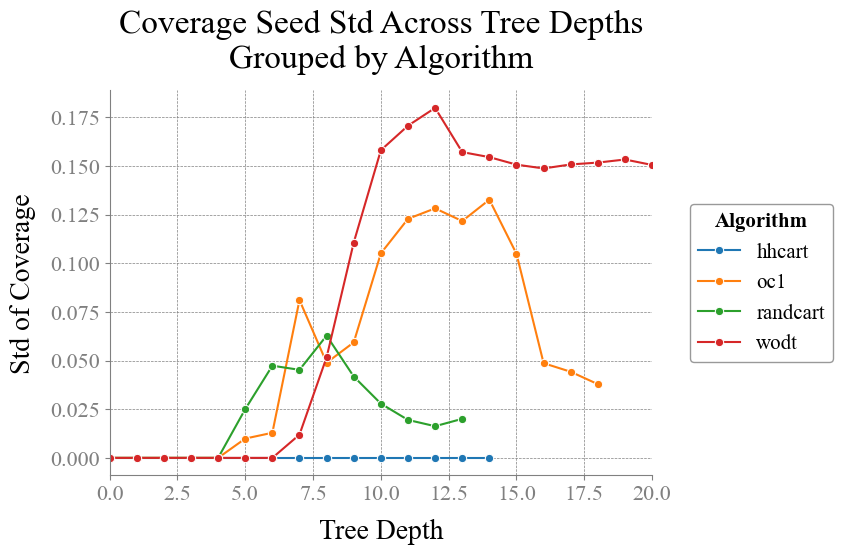

Figure saved: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_batch_results\plots\grouped_by_algorithm\density_seed_std_vs_depth__grouped_by_algorithm.pdf


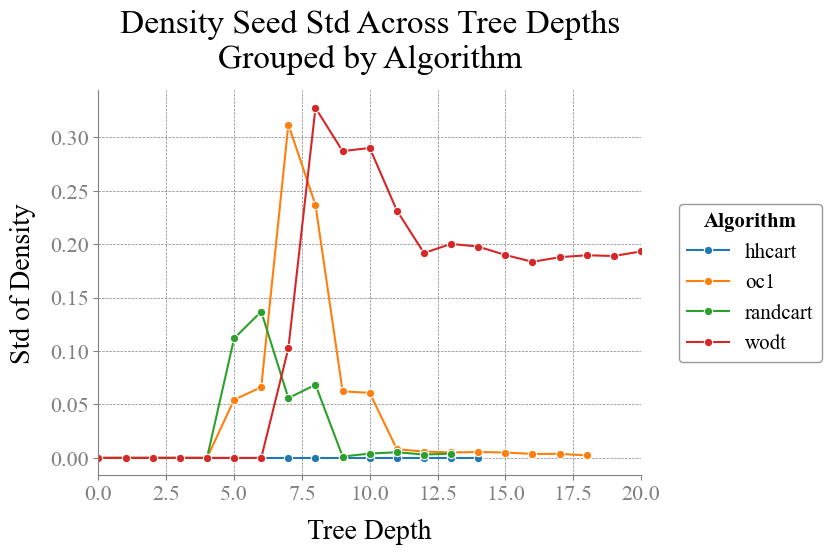

In [10]:
# === 4. Std across seeds grouped by algorithm === #
for metric in metrics:
    save_path = os.path.join(per_algorithm_dir, f"{metric}_seed_std_vs_depth__grouped_by_algorithm.pdf")
    title = f"{metric.capitalize()} Seed Std Across Tree Depths\nGrouped by Algorithm"

    plot_seed_std_vs_depth_per_algorithm(
        df=df,
        metric=metric,
        title=title,
        x_lim=x_lim,
        xlabel="Tree Depth",
        ylabel=f"Std of {metric.capitalize()}",
        save_name=save_path
    )


Saved to: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_batch_results\plots\coverage_density_colormap_randcart.pdf


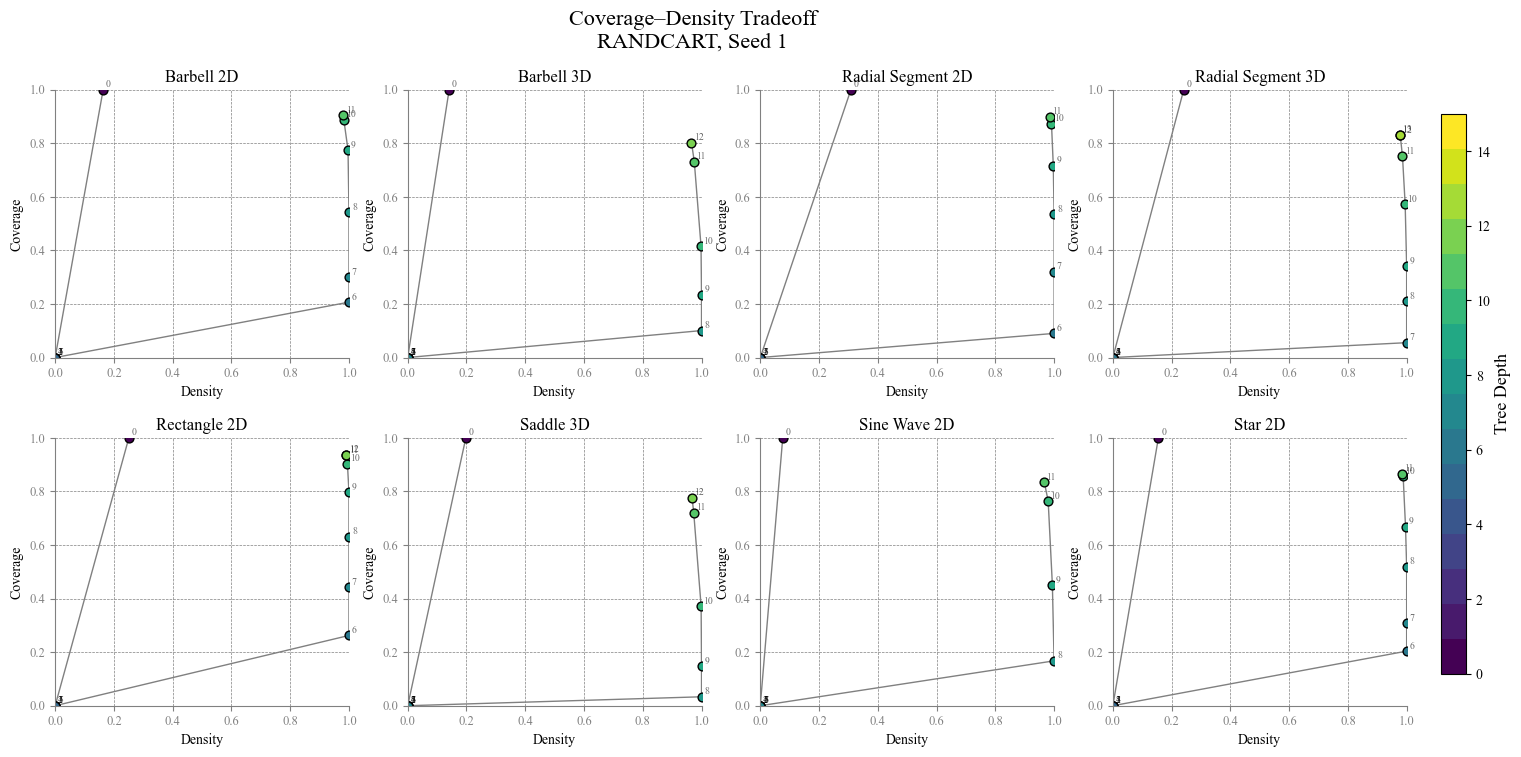

In [11]:
plot_coverage_density_all_shapes_for_algorithm(df=df, algorithm="randcart", seed=0)